In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from utils import modeling_utils as mu

In [2]:
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('../data/german_credit_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df['target'] = (df.risk == 'bad').astype(int)
df.sample(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,target
18,44,female,3,free,little,moderate,12579,24,car,bad,1
229,22,male,2,free,little,little,3149,24,furniture/equipment,good,0
293,56,male,2,free,little,rich,4796,42,car,good,0


In [4]:
test_set_results = pd.read_csv('../data/test_set_results.csv')

In [5]:
y_test = test_set_results.y_test
y_pred_proba = test_set_results.y_pred_proba

In [6]:
def cal(proporcao_default, ratio_prejuizo, specificity = 0.3, sensitivity = 0.3):
    if ratio_prejuizo < 0:
        ratio_prejuizo = -ratio_prejuizo*-1

    expected_bad_clients = 100*proporcao_default
    expected_good_clients = 100*(1-proporcao_default)

    lost_good = expected_good_clients * (1 - specificity)
    avoided_bad = expected_bad_clients * sensitivity

    expected_return = avoided_bad * ratio_prejuizo - lost_good

    percentual_expected_return = expected_return/expected_good_clients

    return(percentual_expected_return)

In [93]:
def plot_default_and_loss(specificity, sensitivity, 
         range_proporcao_default = (0.01, 0.99), range_ratio_prejuizo = (-5, 10),
         destacar_ponto = False):

    x = []
    y = []
    c = []

    r, g, b = [], [], []

    tam = 200
    for i in np.linspace(range_proporcao_default[0], range_proporcao_default[1], tam):
        #for j in np.linspace(range_ratio_prejuizo[0], range_ratio_prejuizo[1], tam):
        for j in np.logspace(np.log10(range_ratio_prejuizo[0]), np.log10(range_ratio_prejuizo[1]), tam):
            x.append(i)
            y.append(j)

            valor_esperado = cal(i, j, specificity = specificity, sensitivity = sensitivity)


            red = np.clip(valor_esperado, -100, 0) * -1
            blue = np.clip(valor_esperado, 0, 100)
            green = 0

            r.append(red)
            g.append(green)
            b.append(blue)

    r = np.array(r)/np.max(r)
    b = np.array(b)/np.max(b)

    b = (b**1)*0.7
    r = (r**1)*0.7
    g = b*0.4 + r*0.15

    c = np.array([r, g, b]).T


    ## scatter with square markers
    plt.figure(figsize=(10.,5))
    plt.scatter(x, y, c = c, alpha = 0.25, s = 65,
                marker = 'o')

    plt.title(f'specificity = {specificity}, sensitivity = {sensitivity}')
    
    plt.xlabel('proporcao_default')
    plt.ylabel('ratio_prejuizo')
                

    ## change plot frame color
    ax = plt.gca()

    ## hide all spin
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ## hide ticks
    ax.tick_params(axis='both', which='both', length=0)


    ax.set_xlim(range_proporcao_default)
    ax.set_ylim(range_ratio_prejuizo)

    plt.yscale("log")

    if destacar_ponto is not False:
        plt.scatter(destacar_ponto[0], destacar_ponto[1], c = 'silver', s = 50, marker = 'o', alpha = 0.5)

In [73]:
def plot_specificity_sensitivity(proporcao_default, ratio_prejuizo, 
         range_specificity = (0.01, 0.99), range_sensitivity = (0.01, 0.99),
         destacar_ponto = False):

    x = []
    y = []
    c = []

    r, g, b = [], [], []

    tam = 200
    for i in np.linspace(range_specificity[0], range_specificity[1], tam):
        for j in np.linspace(range_sensitivity[0], range_sensitivity[1], tam):
            x.append(i)
            y.append(j)

            valor_esperado = cal(proporcao_default, ratio_prejuizo, specificity = i, sensitivity = j)

            red = np.clip(valor_esperado, -1000, 0) * -1
            blue = np.clip(valor_esperado, 0, 1000)
            green = 0

            r.append(red)
            g.append(green)
            b.append(blue)

    r = np.array(r)/np.max(r)
    b = np.array(b)/np.max(b)

    r = (r**1)*0.7
    b = (b**1)*0.7
    g = b*0.4 + r*0.15

    c = np.array([r, g, b]).T


    ## scatter with square markers
    plt.figure(figsize=(10.,5))
    plt.title(f'proporcao_default: {proporcao_default}, ratio_prejuizo: {ratio_prejuizo}')
    
    plt.scatter(x, y, c = c, alpha = 0.3, s = 65,
                marker = 'o')

    plt.xlabel('specificity')
    plt.ylabel('sensitivity')
                

    ## change plot frame color
    ax = plt.gca()

    ## hide all spin
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ## hide ticks
    ax.tick_params(axis='both', which='both', length=0)


    ax.set_xlim(range_specificity)
    ax.set_ylim(range_sensitivity)

    if destacar_ponto is not False:
        plt.scatter(destacar_ponto[0], destacar_ponto[1], label = destacar_ponto[2],
        c = destacar_ponto[3], s = 10, marker = 'o', alpha = 0.8)

## scenario 1 

In [111]:
## scenario 1
default_rate = 0.3
bad_customer_cost = 1

m = metrics_by_threshold_table = mu.get_metrics_by_threshold_table(y_test, y_pred_proba, bad_customer_cost)

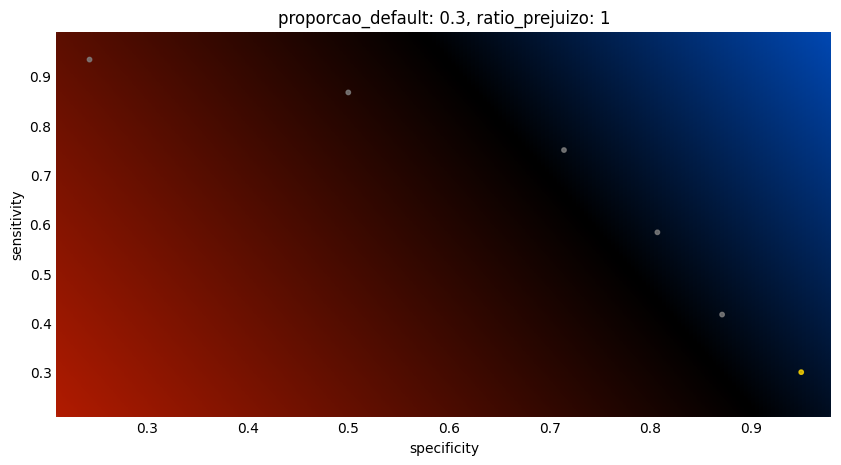

In [112]:
plot_specificity_sensitivity(proporcao_default = default_rate, ratio_prejuizo = bad_customer_cost,
         range_specificity = (0.21, .98), range_sensitivity = (0.21, .99), 
         destacar_ponto = [
                m['specificity']/100, m['recall/sensitivity']/100,
                m['thres'].tolist(), m['color'].tolist()])

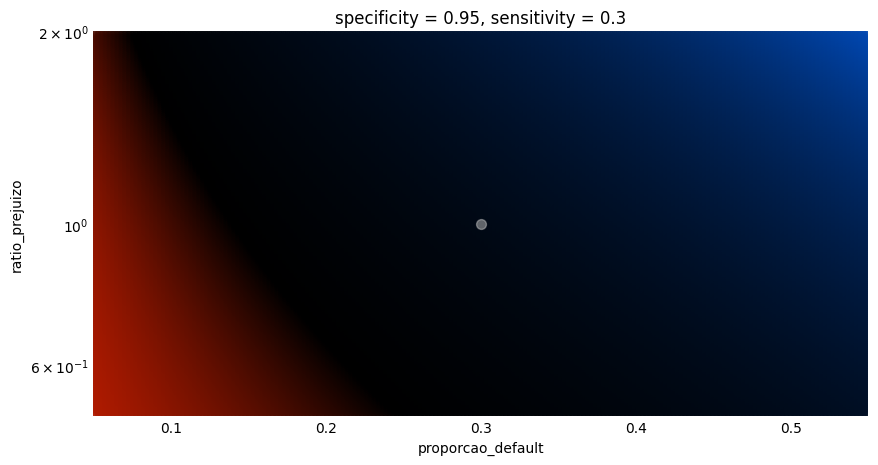

In [113]:
sensitivity, specificity, threshold = m[m.color == 'gold'][['recall/sensitivity', 'specificity', 'thres']].values[0]/100

plot_default_and_loss(specificity = specificity, sensitivity = sensitivity,
     range_proporcao_default = (0.05, 0.55),
        range_ratio_prejuizo = (0.5, 2),
        destacar_ponto=(0.3, 1))

## scenario 2

In [114]:
## scenario 1
default_rate = 0.3
bad_customer_cost = 5

m = metrics_by_threshold_table = mu.get_metrics_by_threshold_table(y_test, y_pred_proba, bad_customer_cost)

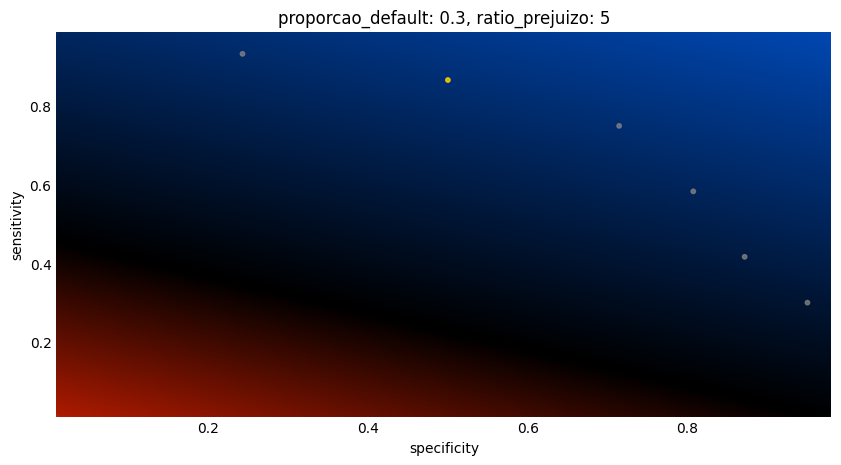

In [115]:
plot_specificity_sensitivity(proporcao_default = default_rate, ratio_prejuizo = bad_customer_cost,
         range_specificity = (0.01, .98), range_sensitivity = (0.01, .99), 
         destacar_ponto = [
                m['specificity']/100, m['recall/sensitivity']/100,
                m['thres'].tolist(), m['color'].tolist()])

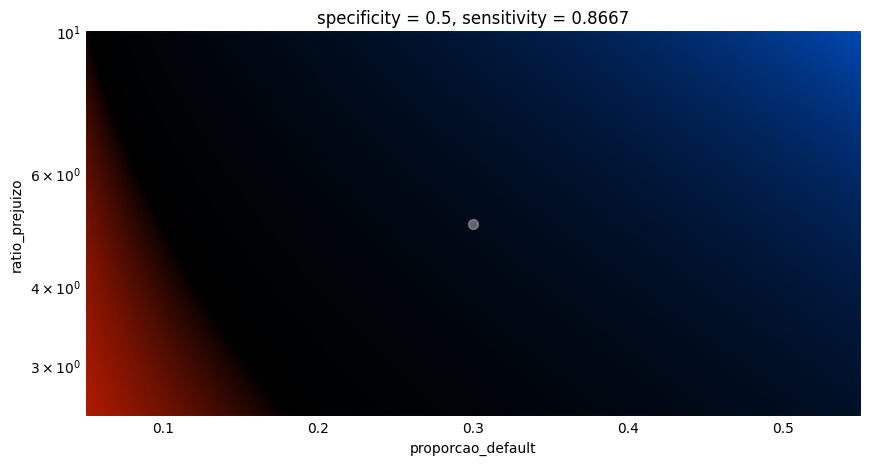

In [116]:
sensitivity, specificity, threshold = m[m.color == 'gold'][['recall/sensitivity', 'specificity', 'thres']].values[0]/100

plot_default_and_loss(specificity = specificity, sensitivity = sensitivity,
     range_proporcao_default = (0.05, 0.55),
        range_ratio_prejuizo = (2.5, 10),
        destacar_ponto=(0.3, 5))